In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [61]:
data = pd.read_csv("inequality_output.csv")
data.head()

,Step,AgentID,Wealth,Bracket,Pay
0,1,1,0.963204,Upper,0.28
1,1,2,1.264341,Upper,0.22
2,1,3,0.989172,Upper,0.39
3,1,4,0.810033,Upper,0.20
4,1,5,1.249974,Upper,0.23


In [62]:
bracs = data[data["Step"]==100]
bracs["Bracket"].value_counts()

Bracket
Lower     183
Middle     13
Upper       4
Name: count, dtype: int64

<Axes: >

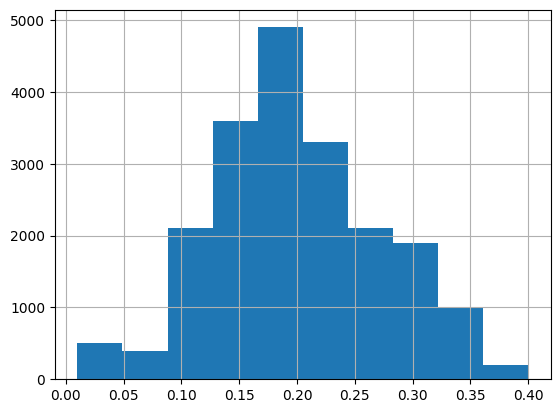

In [63]:
data["Pay"].hist()

In [64]:
final = data[data["Step"]==100]
final = list(final["Wealth"])


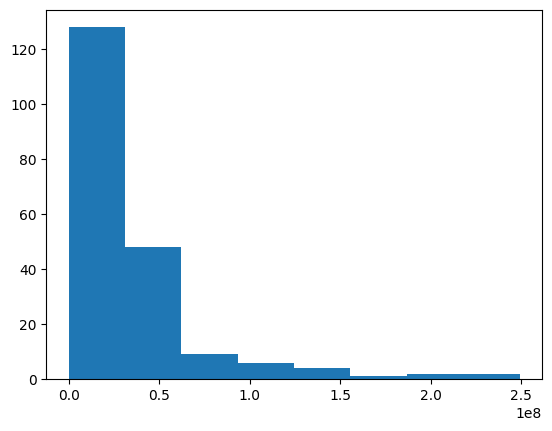

In [65]:
#uses sturges rule of bin creation
plt.hist(final, bins = int(np.log2(200) + 1))
None

In [66]:
min(final), max(final), sum(final)

(0.0, 249038169.4923882, 6659897615.559252)

In [67]:
X= list(range(1, 201))
y = sorted(final)

In [68]:
len(y), len(X)

(200, 200)

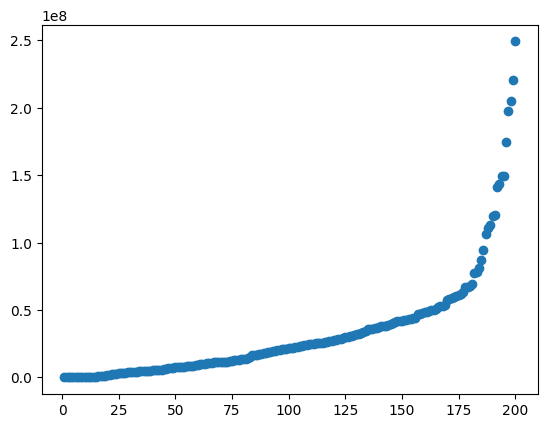

In [69]:
plt.scatter(X,y)

In [71]:
# Filter the DataFrame to include only rows where Step is 100
step_100_df = data[data['Step'] == 100]

# Find the row with the minimum Wealth at Step 100
max_wealth_row = step_100_df.loc[step_100_df['Wealth'].idxmax()]
max_wealth_row

Step                    100
AgentID                 198
Wealth     249038169.492388
Bracket               Upper
Pay                     0.4
Name: 19997, dtype: object

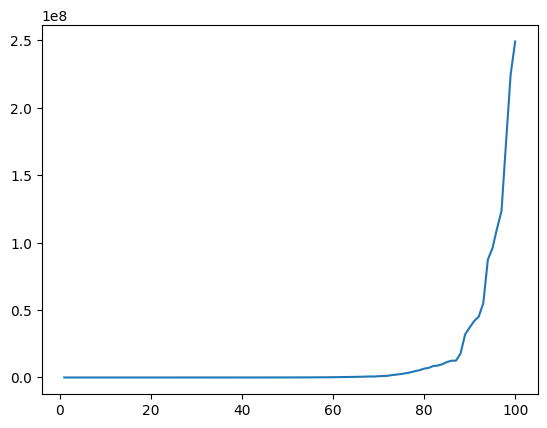

In [72]:
oneagent = data.loc[data['AgentID'] == max_wealth_row["AgentID"]]


# Plot the wealth of agent 14 over time
g = plt.plot(oneagent["Step"], oneagent["Wealth"])

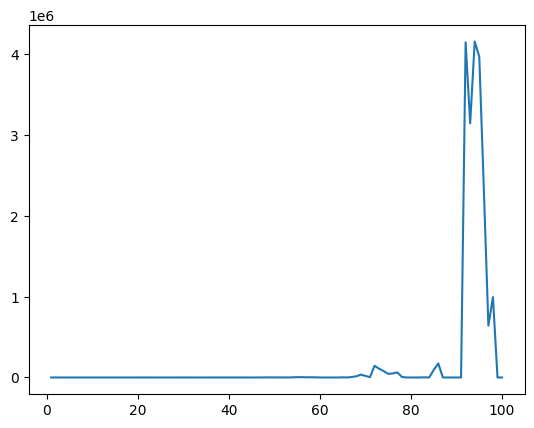

In [73]:
min_wealth_row = step_100_df.loc[step_100_df['Wealth'].idxmin()]
oneagent = data.loc[data['AgentID'] == min_wealth_row["AgentID"]]


# Plot the wealth of agent 14 over time
g = plt.plot(oneagent["Step"], oneagent["Wealth"])

In [74]:
ccdf =[]
for idx in range(len(final)): 
    if len(ccdf) == 0: 
        ccdf.append(final[idx])
    else: 
        ccdf.append(final[idx]+ccdf[-1])

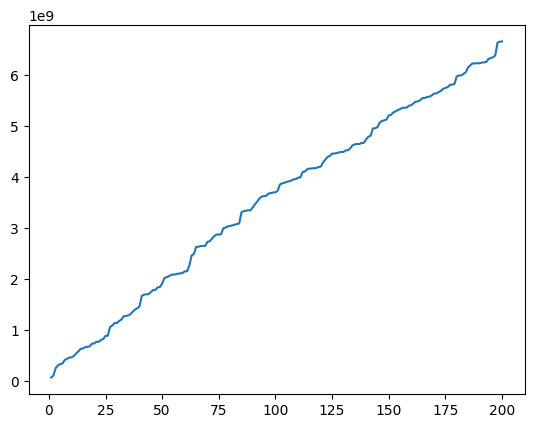

In [75]:
plt.plot(X,ccdf)


In [76]:
data2 = pd.read_csv("model_output.csv")
data2.head()

,Unnamed: 0,Gini,Total
0,0,0.140930,224.041498
1,1,0.218080,253.370116
2,2,0.282360,288.558402
3,3,0.353173,333.479277
4,4,0.400648,388.166778


In [77]:
data2["Gini"]

0     0.140930
1     0.218080
2     0.282360
3     0.353173
4     0.400648
        ...   
95    0.560927
96    0.554770
97    0.544419
98    0.558067
99    0.559720
Name: Gini, Length: 100, dtype: float64

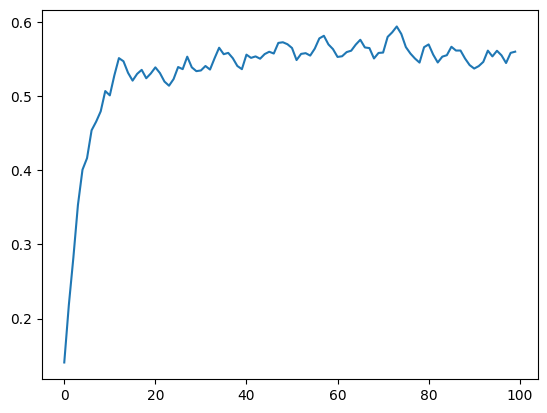

In [78]:
plt.plot(data2["Gini"])

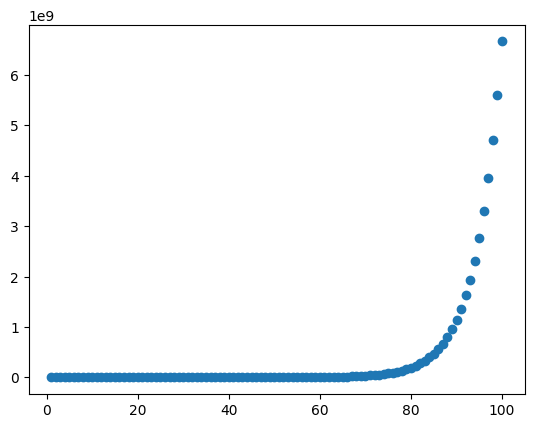

In [79]:
x = range(1,101)
plt.scatter(x,data2["Total"])

In [80]:
data2["Total"]

0     2.240415e+02
1     2.533701e+02
2     2.885584e+02
3     3.334793e+02
4     3.881668e+02
          ...     
95    3.304181e+09
96    3.944776e+09
97    4.700966e+09
98    5.603793e+09
99    6.659898e+09
Name: Total, Length: 100, dtype: float64

(array([149.,  20.,  19.,   4.,   1.,   4.,   1.,   0.,   1.,   1.]),
 array([1.69699586e-03, 6.15612728e-01, 1.22952846e+00, 1.84344419e+00,
        2.45735993e+00, 3.07127566e+00, 3.68519139e+00, 4.29910712e+00,
        4.91302285e+00, 5.52693859e+00, 6.14085432e+00]),
 <BarContainer object of 10 artists>)

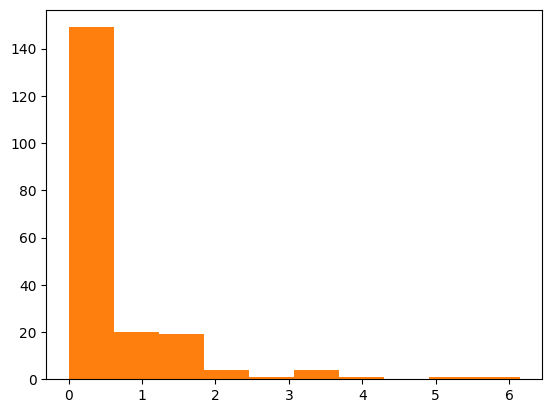

In [89]:
import numpy as np
payday_array = np.random.normal(loc=0.5,
                                          scale=0.1,
                                          size=200)
innovation_array = np.random.pareto(2.5,size=200)
x = range(1,201)
plt.hist(payday_array)
plt.hist(innovation_array)

In [82]:
data2= data[data["Step"]==100]

In [83]:
exp_scale = np.mean([wealth for wealth in data2["Wealth"]])
exp_scale

np.float64(33299488.077796258)

In [84]:
from scipy.stats import expon
expon.ppf(0.8, scale=exp_scale)

np.float64(53593458.57705263)

In [85]:
for i in np.arange(0.1,1,0.1): 
    print(expon.ppf(i, scale=exp_scale))

3508451.2350182533
7430566.026624646
11877093.04333647
17010231.768428445
23081446.275213987
30512012.301838633
40091678.04364244
53593458.57705263
76674904.85226662


In [86]:
108887081.052577

108887081.052577